In [56]:
import pandas as pd

df= pd.read_csv("/Users/murathanozdemir/Desktop/merged_stop-and-searchv1.csv", delimiter=';')


df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2021-03-01T00:00:00+00:00,False,NaN,51.562167,0.010577,Male,over 34,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN
1,Person search,2021-03-01T00:01:00+00:00,False,NaN,51.501340,-0.424000,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN
2,Person search,2021-03-01T00:01:00+00:00,False,NaN,NaN,NaN,Male,over 34,Other ethnic group - Not stated,Black,Firearms Act 1968 (section 47),Firearms,A no further action disposal,NaN,NaN
3,Person search,2021-03-01T00:01:00+00:00,False,NaN,51.477558,-0.361185,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Arrest,NaN,NaN
4,Person search,2021-03-01T00:02:00+00:00,False,NaN,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517760,Person and Vehicle search,2024-01-31T23:20:00+00:00,False,NaN,NaN,NaN,Female,18-24,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN
517761,Person search,2024-01-31T23:28:00+00:00,False,NaN,51.595335,-0.003321,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,NaN
517762,Person and Vehicle search,2024-01-31T23:34:00+00:00,False,NaN,51.534509,-0.145760,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,NaN
517763,Person search,2024-01-31T23:47:00+00:00,False,NaN,51.509064,-0.130120,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Penalty Notice for Disorder,NaN,NaN


In [57]:
import pandas as pd
import numpy as np

# Example coordinates for the boroughs (approximate central points)
borough_coordinates = {
    "Croydon": (51.3721, -0.1096),
    "Barnet": (51.6538, -0.2006),
    "Ealing": (51.5135, -0.3088),
    "Newham": (51.5070, 0.0460),
    "Brent": (51.5588, -0.2817),
    "Bromley": (51.4050, 0.0140),
    "Enfield": (51.6521, -0.0847),
    "Wandsworth": (51.4562, -0.1910),
    "Lambeth": (51.4607, -0.1165),
    "Tower Hamlets": (51.5200, -0.0295),
    "Redbridge": (51.5588, 0.0827),
    "Southwark": (51.5035, -0.0804),
    "Hillingdon": (51.5336, -0.4493),
    "Lewisham": (51.4452, -0.0209),
    "Greenwich": (51.4892, 0.0648),
    "Hounslow": (51.4746, -0.3610),
    "Waltham Forest": (51.5886, -0.0160),
    "Haringey": (51.5908, -0.1110),
    "Havering": (51.5607, 0.1830),
    "Harrow": (51.5783, -0.3347),
    "Hackney": (51.5450, -0.0551),
    "Bexley": (51.4567, 0.1372),
    "Barking and Dagenham": (51.5441, 0.1515),
    "Islington": (51.5380, -0.1030),
    "Merton": (51.4036, -0.1962),
    "Camden": (51.5290, -0.1255),
    "Sutton": (51.3618, -0.1944),
    "Westminster": (51.4975, -0.1357),
    "Richmond upon Thames": (51.4512, -0.3268),
    "Hammersmith and Fulham": (51.4927, -0.2333),
    "Kingston upon Thames": (51.4123, -0.2990),
    "Kensington and Chelsea": (51.4942, -0.1941),
    "City of London": (51.5155, -0.0922)
}

# Function to calculate the Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # radius of Earth in meters
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c  # output distance in meters

# Function to find the closest borough based on latitude and longitude
def find_borough(lat, lon, borough_coordinates):
    closest_borough = "Unknown"
    min_distance = float('inf')
    
    for borough, coord in borough_coordinates.items():
        distance = haversine(lat, lon, coord[0], coord[1])
        if distance < min_distance:
            min_distance = distance
            closest_borough = borough
                
    return closest_borough

# Assuming df is already loaded DataFrame
# Create a new column 'Borough' without modifying the existing DataFrame
df['Borough'] = df.apply(lambda row: find_borough(row['Latitude'], row['Longitude'], borough_coordinates) if not pd.isna(row['Latitude']) and not pd.isna(row['Longitude']) else "Unknown", axis=1)



In [58]:
df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough
0,Person search,2021-03-01T00:00:00+00:00,False,NaN,51.562167,0.010577,Male,over 34,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN,Waltham Forest
1,Person search,2021-03-01T00:01:00+00:00,False,NaN,51.501340,-0.424000,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Hillingdon
2,Person search,2021-03-01T00:01:00+00:00,False,NaN,NaN,NaN,Male,over 34,Other ethnic group - Not stated,Black,Firearms Act 1968 (section 47),Firearms,A no further action disposal,NaN,NaN,Unknown
3,Person search,2021-03-01T00:01:00+00:00,False,NaN,51.477558,-0.361185,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Arrest,NaN,NaN,Hounslow
4,Person search,2021-03-01T00:02:00+00:00,False,NaN,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517760,Person and Vehicle search,2024-01-31T23:20:00+00:00,False,NaN,NaN,NaN,Female,18-24,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN,Unknown
517761,Person search,2024-01-31T23:28:00+00:00,False,NaN,51.595335,-0.003321,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,NaN,Waltham Forest
517762,Person and Vehicle search,2024-01-31T23:34:00+00:00,False,NaN,51.534509,-0.145760,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,NaN,Camden
517763,Person search,2024-01-31T23:47:00+00:00,False,NaN,51.509064,-0.130120,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Penalty Notice for Disorder,NaN,NaN,Westminster


In [40]:
# Count the occurrences of each unique outcome
outcome_counts = df['Outcome'].value_counts()

# Calculate the percentage for each outcome
outcome_percentages = (outcome_counts / outcome_counts.sum()) * 100

# Create a DataFrame for better visualization
outcome_analysis = pd.DataFrame({
    'Outcome': outcome_counts.index,
    'Count': outcome_counts.values,
    'Percentage': outcome_percentages.values
})

# Display the results
print(outcome_analysis)

                           Outcome   Count  Percentage
0     A no further action disposal  372972   72.034997
1                           Arrest   72337   13.971010
2             Community resolution   47858    9.243189
3      Penalty Notice for Disorder   16235    3.135592
4        Summons / charged by post    7870    1.519995
5  Caution (simple or conditional)     493    0.095217


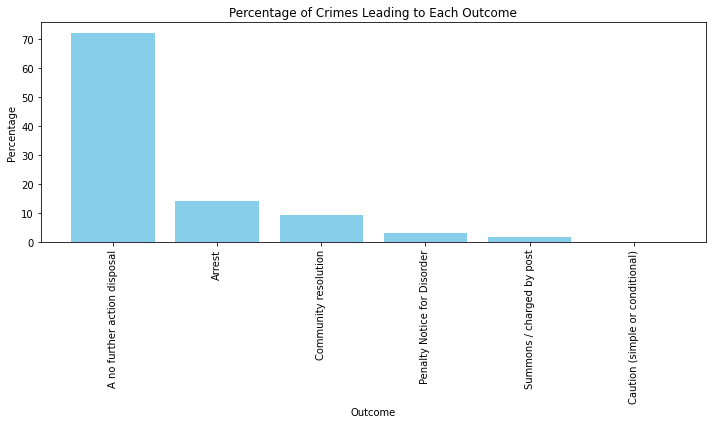

In [41]:
import matplotlib.pyplot as plt


# Count the occurrences of each unique outcome
outcome_counts = df['Outcome'].value_counts()

# Calculate the percentage for each outcome
outcome_percentages = (outcome_counts / outcome_counts.sum()) * 100

# Create a DataFrame for better visualization
outcome_analysis = pd.DataFrame({
    'Outcome': outcome_counts.index,
    'Count': outcome_counts.values,
    'Percentage': outcome_percentages.values
})

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(outcome_analysis['Outcome'], outcome_analysis['Percentage'], color='skyblue')
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Percentage of Crimes Leading to Each Outcome')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the chart
plt.show()


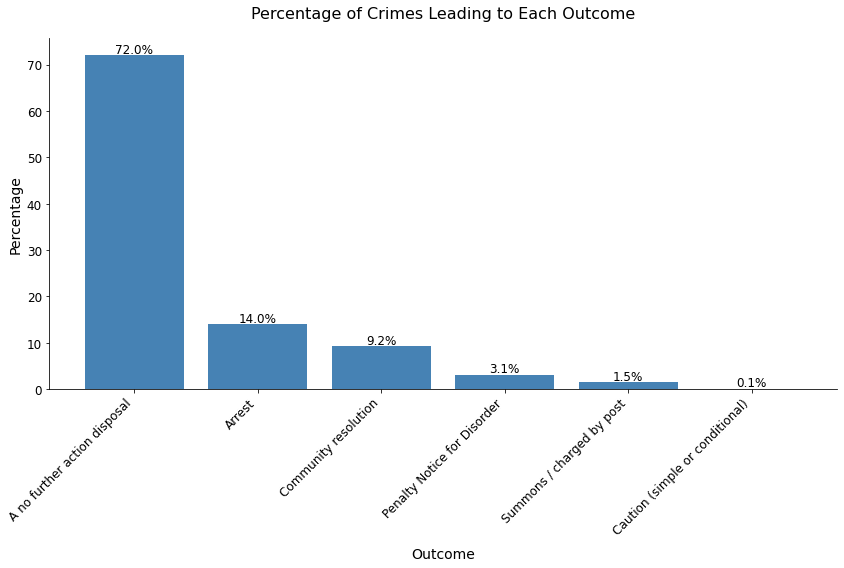

In [73]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique outcome
outcome_counts = df['Outcome'].value_counts()

# Calculate the percentage for each outcome
outcome_percentages = (outcome_counts / outcome_counts.sum()) * 100

# Create a DataFrame for better visualization
outcome_analysis = pd.DataFrame({
    'Outcome': outcome_counts.index,
    'Count': outcome_counts.values,
    'Percentage': outcome_percentages.values
})

# Plotting the data
plt.figure(figsize=(12, 8))
plt.bar(outcome_analysis['Outcome'], outcome_analysis['Percentage'], color='steelblue')

# Customize the appearance
plt.xlabel('Outcome', fontsize=14, labelpad=10)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of Crimes Leading to Each Outcome', fontsize=16, pad=20)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(outcome_analysis['Percentage']):
    plt.text(i, v + 0.5, f'{v:.1f}%', fontsize=12, ha='center')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

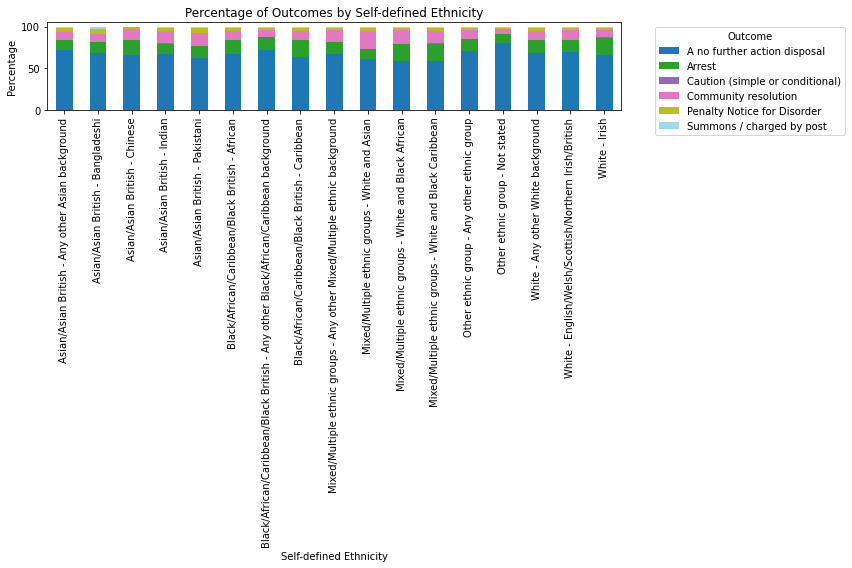

In [42]:
# Group by ethnicity and outcome, then count occurrences
ethnicity_outcome_counts = df.groupby(['Self-defined ethnicity', 'Outcome']).size().unstack(fill_value=0)

# Calculate the percentage for each outcome within each ethnicity group
ethnicity_outcome_percentages = ethnicity_outcome_counts.div(ethnicity_outcome_counts.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
ax = ethnicity_outcome_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.xlabel('Self-defined Ethnicity')
plt.ylabel('Percentage')
plt.title('Percentage of Outcomes by Self-defined Ethnicity')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the chart
plt.show()

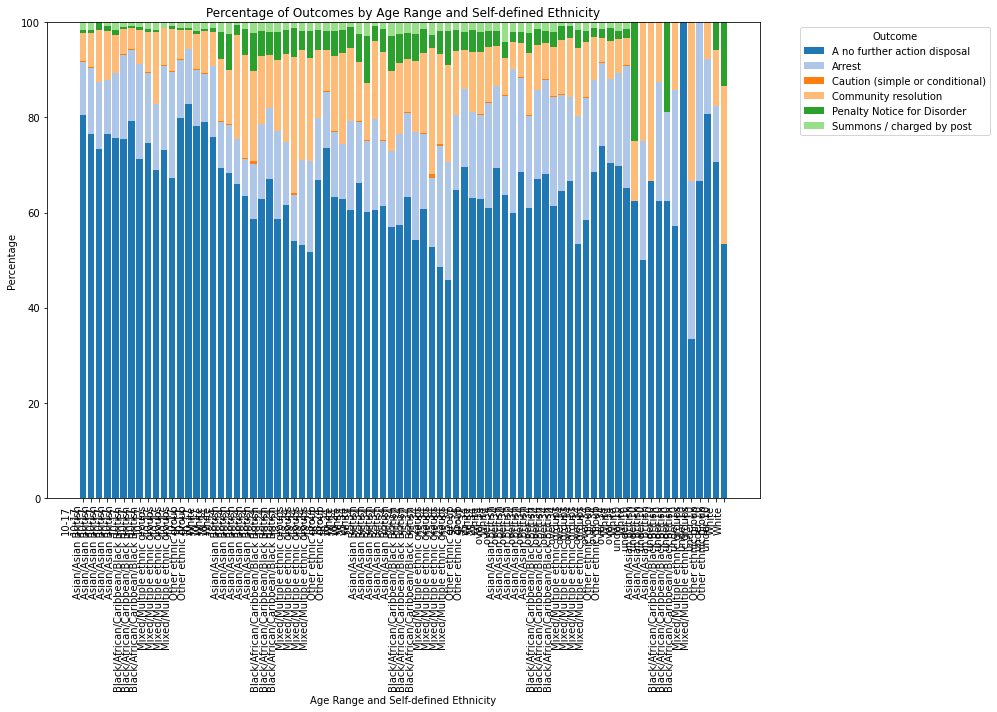

In [43]:

# Assuming the data is loaded into a DataFrame named df
# df = pd.read_csv('your_dataset.csv')  # This line is just for reference

# Group by age range, ethnicity, and outcome, then count occurrences
age_ethnicity_outcome_counts = df.groupby(['Age range', 'Self-defined ethnicity', 'Outcome']).size().unstack(fill_value=0)

# Calculate the percentage for each outcome within each age and ethnicity group
age_ethnicity_outcome_percentages = age_ethnicity_outcome_counts.div(age_ethnicity_outcome_counts.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Define the positions for the bars
bar_positions = range(len(age_ethnicity_outcome_percentages))

# Define the colors for each outcome
colors = plt.get_cmap('tab20').colors

# Plot each outcome as a stacked bar
bottom_values = [0] * len(age_ethnicity_outcome_percentages)
for i, outcome in enumerate(age_ethnicity_outcome_percentages.columns):
    outcome_values = age_ethnicity_outcome_percentages[outcome].values
    ax.bar(bar_positions, outcome_values, bottom=bottom_values, color=colors[i], label=outcome)
    bottom_values = [a + b for a, b in zip(bottom_values, outcome_values)]

# Customize the plot
ax.set_xticks(bar_positions)
ax.set_xticklabels([f'{age}\n{ethnicity.split(" - ")[0]}' for age, ethnicity in age_ethnicity_outcome_percentages.index], rotation=90, ha='right')
ax.set_xlabel('Age Range and Self-defined Ethnicity')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Outcomes by Age Range and Self-defined Ethnicity')
ax.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Display the chart
plt.show()

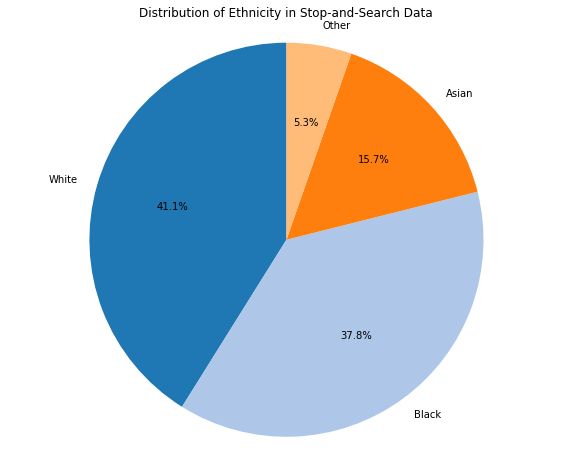

In [44]:
# Assuming the data is loaded into a DataFrame named df
# df = pd.read_csv('your_dataset.csv')  # This line is just for reference

# Group by self-defined ethnicity and count occurrences
ethnicity_counts = df['Officer-defined ethnicity'].value_counts()

# Calculate the percentage distribution for each ethnicity
ethnicity_percentages = (ethnicity_counts / ethnicity_counts.sum()) * 100

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(ethnicity_percentages, labels=ethnicity_percentages.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('tab20').colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ethnicity in Stop-and-Search Data')

# Display the chart
plt.show()

# Display the DataFrame to the user
ethnicity_distribution = pd.DataFrame({
    'Ethnicity': ethnicity_counts.index,
    'Count': ethnicity_counts.values,
    'Percentage': ethnicity_percentages.values
})

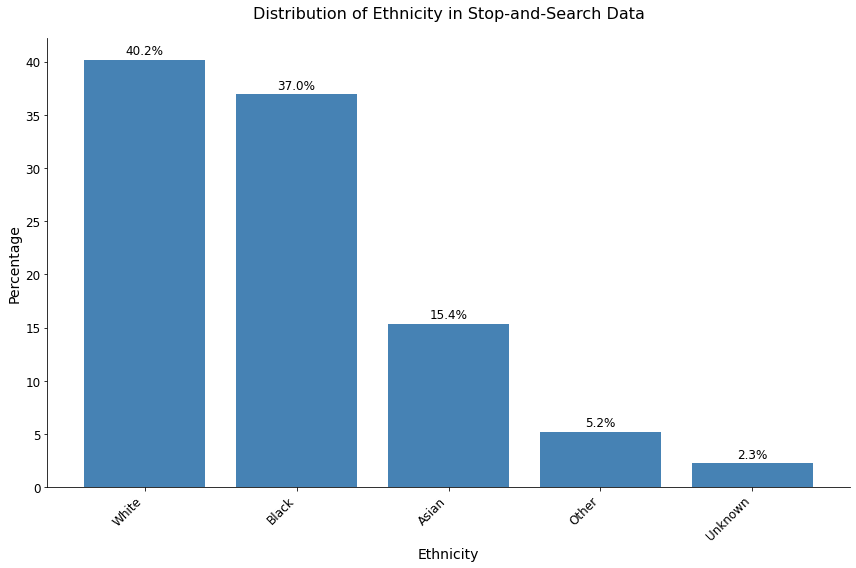

  Ethnicity   Count  Percentage
0     White  208008   40.174210
1     Black  191336   36.954217
2     Asian   79644   15.382268
3     Other   27014    5.217425
4   Unknown   11763    2.271880


In [75]:
import matplotlib.pyplot as plt

# Assuming the data is loaded into a DataFrame named df
# df = pd.read_csv('your_dataset.csv')  # This line is just for reference

# Group by self-defined ethnicity and count occurrences
ethnicity_counts = df['Officer-defined ethnicity'].value_counts()

# Calculate the percentage distribution for each ethnicity
ethnicity_percentages = (ethnicity_counts / ethnicity_counts.sum()) * 100

# Create a DataFrame for better visualization
ethnicity_distribution = pd.DataFrame({
    'Ethnicity': ethnicity_counts.index,
    'Count': ethnicity_counts.values,
    'Percentage': ethnicity_percentages.values
})

# Sort the DataFrame by percentage in descending order
ethnicity_distribution = ethnicity_distribution.sort_values('Percentage', ascending=False)

# Plotting the vertical bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(ethnicity_distribution['Ethnicity'], ethnicity_distribution['Percentage'], color='steelblue')

# Add percentage labels to the bars
for i, v in enumerate(ethnicity_distribution['Percentage']):
    ax.text(i, v + 0.5, f'{v:.1f}%', fontsize=12, ha='center')

# Customize the appearance
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Distribution of Ethnicity in Stop-and-Search Data', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

# Display the DataFrame to the user
print(ethnicity_distribution)

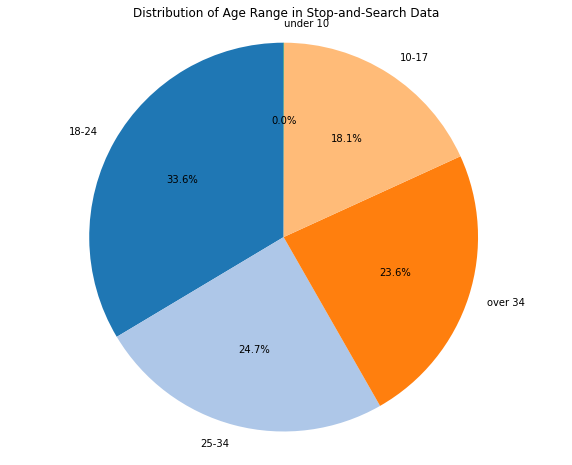

In [45]:

# Group by age range and count occurrences
age_counts = df['Age range'].value_counts()

# Calculate the percentage distribution for each age range
age_percentages = (age_counts / age_counts.sum()) * 100

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(age_percentages, labels=age_percentages.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('tab20').colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Age Range in Stop-and-Search Data')

# Display the chart
plt.show()

# Display the DataFrame to the user
age_distribution = pd.DataFrame({
    'Age Range': age_counts.index,
    'Count': age_counts.values,
    'Percentage': age_percentages.values
})

In [59]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# Handle missing values
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)
df.fillna('Unknown', inplace=True)

# Create a binary target variable
df['target'] = df['Outcome'].apply(lambda x: 1 if x == "A no further action disposal" else 0)

features = df[['Self-defined ethnicity', 'Age range', 'Gender', 'Object of search', 'Borough']]
target = df['target']

# Define the preprocessing for categorical features
categorical_features = ['Self-defined ethnicity', 'Gender', 'Object of search', 'Borough']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess age range using label encoding
features['Age range'] = LabelEncoder().fit_transform(features['Age range'])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Define class weights
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=target)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight=class_weight_dict, max_iter=1000))
])

# Hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(features, target)

# Best model
best_model = grid_search.best_estimator_

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the model
best_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Cross-validation for more robust evaluation
cv_scores = cross_val_score(best_model, features, target, cv=5, scoring='f1')
print("Cross-validated F1-score:", cv_scores.mean())


/var/folders/xh/lwhqjwk96bzbypx1bnkvl77m0000gn/T/ipykernel_45363/2230923984.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Age range'] = LabelEncoder().fit_transform(features['Age range'])


Accuracy: 0.5399071007117129
Precision: 0.7837365138233311
Recall: 0.49873950706680614
F1-score: 0.6095714168647055
Cross-validated F1-score: 0.6063369901097799


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preprocess the data and create the binary target variable
df['Other_Outcome'] = (df['Outcome'] != 'A no further action disposal').astype(int)

# Select the relevant features
features = ['Officer-defined ethnicity', 'Age range', 'Gender', 'Object of search', 'Borough']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df[features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['Other_Outcome'], test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model's performance on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Examine the model coefficients
coefficients = pd.DataFrame({'Feature': df_encoded.columns, 'Coefficient': model.coef_[0]})
print(coefficients)

Accuracy: 0.7200
Precision: 0.3191
Recall: 0.0005
F1-score: 0.0010
                                              Feature  Coefficient
0                     Officer-defined ethnicity_Asian    -0.146580
1                     Officer-defined ethnicity_Black    -0.023181
2                     Officer-defined ethnicity_Other    -0.125101
3                   Officer-defined ethnicity_Unknown    -0.128570
4                     Officer-defined ethnicity_White    -0.076423
5                                     Age range_10-17    -0.190044
6                                     Age range_18-24     0.402528
7                                     Age range_25-34     0.518576
8                                   Age range_Unknown    -1.661770
9                                   Age range_over 34     0.259849
10                                 Age range_under 10     0.171007
11                                      Gender_Female    -0.756420
12                                        Gender_Male    -0.53

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Univariate Analysis
for col in ['Gender', 'Age range', 'Self-defined ethnicity', 'Object of search', 'Borough']:
    print(f"\n--- {col} ---")
    print(df.groupby([col, 'target']).size().unstack(fill_value=0))

# Bivariate Analysis
for col in ['Gender', 'Age range', 'Self-defined ethnicity', 'Object of search', 'Borough']:
    contingency_table = pd.crosstab(df[col], df['target'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\n--- {col} ---")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"P-value: {p:.5f}")

# Multivariate Analysis
# Assuming you have already performed the necessary data preprocessing and feature encoding
X = df[['Gender', 'Age range', 'Self-defined ethnicity', 'Object of search', 'Borough']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("\n--- Logistic Regression Coefficients ---")
for col, coef in zip(X.columns, model.coef_[0]):
    print(f"{col}: {coef:.2f}");


--- Gender ---
target        0       1
Gender                 
Female    10795   32119
Male     131860  336526
Other        84     406
Unknown    2054    3921

--- Age range ---
target         0      1
Age range              
10-17      17054  63840
18-24      50068  99630
25-34      39902  70162
Unknown     5805  66107
over 34    31917  73132
under 10      47    101

--- Self-defined ethnicity ---
target                                                  0       1
Self-defined ethnicity                                           
Asian/Asian British - Any other Asian background     8639   22381
Asian/Asian British - Bangladeshi                    3987    8583
Asian/Asian British - Chinese                         225     437
Asian/Asian British - Indian                         2400    4884
Asian/Asian British - Pakistani                      2512    4241
Black/African/Caribbean/Black British - African     11340   23213
Black/African/Caribbean/Black British - Any oth...  16598   43167
Bla

ValueError: could not convert string to float: 'Male'

In [16]:
age_range_table = pd.crosstab(df['Age range'], df['target'])
age_range_prob = age_range_table.div(age_range_table.sum(axis=1), axis=0)

print("Conditional Probabilities:")
print(age_range_prob)

Conditional Probabilities:
target            0         1
Age range                    
10-17      0.210819  0.789181
18-24      0.334460  0.665540
25-34      0.362535  0.637465
Unknown    0.080724  0.919276
over 34    0.303830  0.696170
under 10   0.317568  0.682432


In [17]:
ethnicity_table = pd.crosstab(df['Self-defined ethnicity'], df['target'])
ethnicity_prob = ethnicity_table.div(ethnicity_table.sum(axis=1), axis=0)

print("Conditional Probabilities:")
print(ethnicity_prob)

Conditional Probabilities:
target                                                     0         1
Self-defined ethnicity                                                
Asian/Asian British - Any other Asian background    0.278498  0.721502
Asian/Asian British - Bangladeshi                   0.317184  0.682816
Asian/Asian British - Chinese                       0.339879  0.660121
Asian/Asian British - Indian                        0.329489  0.670511
Asian/Asian British - Pakistani                     0.371983  0.628017
Black/African/Caribbean/Black British - African     0.328191  0.671809
Black/African/Caribbean/Black British - Any oth...  0.277721  0.722279
Black/African/Caribbean/Black British - Caribbean   0.362712  0.637288
Mixed/Multiple ethnic groups - Any other Mixed/...  0.331038  0.668962
Mixed/Multiple ethnic groups - White and Asian      0.389325  0.610675
Mixed/Multiple ethnic groups - White and Black ...  0.408419  0.591581
Mixed/Multiple ethnic groups - White and Black ...

In [18]:
ethnicity_table = pd.crosstab(df['Officer-defined ethnicity'], df['target'])
ethnicity_prob = ethnicity_table.div(ethnicity_table.sum(axis=1), axis=0)

print("Conditional Probabilities:")
print(ethnicity_prob)

Conditional Probabilities:
target                            0         1
Officer-defined ethnicity                    
Asian                      0.276192  0.723808
Black                      0.270676  0.729324
Other                      0.276560  0.723440
Unknown                    0.291592  0.708408
White                      0.288955  0.711045


In [60]:
import pandas as pd

# Assuming your DataFrame is named 'df' and has columns 'Officer-defined ethnicity' and 'target'
# Calculate the frequency of each officer-defined ethnicity
ethnicity_freq = df['Officer-defined ethnicity'].value_counts()

# Calculate the conditional probabilities
ethnicity_table = pd.crosstab(df['Officer-defined ethnicity'], df['target'])
ethnicity_prob = ethnicity_table.div(ethnicity_table.sum(axis=1), axis=0)

# Merge the frequency and conditional probabilities
ethnicity_freq_prob = pd.merge(ethnicity_freq.to_frame(name='Frequency'),
                               ethnicity_prob,
                               left_index=True,
                               right_index=True)

# Divide the conditional probabilities by the frequency
ethnicity_freq_prob['Probability 0'] = ethnicity_freq_prob[0] / ethnicity_freq_prob['Frequency']
ethnicity_freq_prob['Probability 1'] = ethnicity_freq_prob[1] / ethnicity_freq_prob['Frequency']

# Print the results
print("Conditional Probabilities Divided by Frequency:")
print(ethnicity_freq_prob[['Frequency', 'Probability 0', 'Probability 1']])

Conditional Probabilities Divided by Frequency:
         Frequency  Probability 0  Probability 1
White       208008       0.000001       0.000003
Black       191336       0.000001       0.000004
Asian        79644       0.000003       0.000009
Other        27014       0.000010       0.000027
Unknown      11763       0.000025       0.000060


In [21]:
import pandas as pd

# Assuming your DataFrame is named 'df' and has columns 'Self-defined ethnicity' and 'target'

# Calculate the frequency of each self-defined ethnicity
ethnicity_freq = df['Self-defined ethnicity'].value_counts()

# Calculate the conditional probabilities
ethnicity_table = pd.crosstab(df['Self-defined ethnicity'], df['target'])
ethnicity_prob = ethnicity_table.div(ethnicity_table.sum(axis=1), axis=0)

# Merge the frequency and conditional probabilities
ethnicity_freq_prob = pd.merge(ethnicity_freq.to_frame(name='Frequency'),
                               ethnicity_prob,
                               left_index=True,
                               right_index=True)

# Divide the conditional probabilities by the frequency
ethnicity_freq_prob['Probability 0'] = ethnicity_freq_prob[0] / ethnicity_freq_prob['Frequency']
ethnicity_freq_prob['Probability 1'] = ethnicity_freq_prob[1] / ethnicity_freq_prob['Frequency']

# Print the results
print("Conditional Probabilities Divided by Frequency:")
print(ethnicity_freq_prob[['Frequency', 'Probability 0', 'Probability 1']])

Conditional Probabilities Divided by Frequency:
                                                    Frequency  Probability 0  \
Other ethnic group - Not stated                        146468       0.000001   
White - English/Welsh/Scottish/Northern Irish/B...      98197       0.000003   
Black/African/Caribbean/Black British - Any oth...      59765       0.000005   
White - Any other White background                      55368       0.000006   
Black/African/Caribbean/Black British - African         34553       0.000009   
Asian/Asian British - Any other Asian background        31020       0.000009   
Black/African/Caribbean/Black British - Caribbean       21433       0.000017   
Other ethnic group - Any other ethnic group             15318       0.000019   
Asian/Asian British - Bangladeshi                       12570       0.000025   
Mixed/Multiple ethnic groups - Any other Mixed/...      10165       0.000033   
Asian/Asian British - Indian                             7284       0.00

In [61]:
import pandas as pd

# Assuming your DataFrame is named 'df' and has columns 'Self-defined ethnicity' and 'target'

# Calculate the frequency of each officer-defined ethnicity
ethnicity_freq = df['Officer-defined ethnicity'].value_counts()

# Calculate the conditional probabilities
ethnicity_table = pd.crosstab(df['Officer-defined ethnicity'], df['target'])
ethnicity_prob = ethnicity_table.div(ethnicity_table.sum(axis=1), axis=0)

# Merge the frequency and conditional probabilities
ethnicity_freq_prob = pd.merge(ethnicity_freq.to_frame(name='Frequency'),
                               ethnicity_prob,
                               left_index=True,
                               right_index=True)

# Divide the conditional probabilities by the frequency
ethnicity_freq_prob['Probability 0'] = ethnicity_freq_prob[0] / ethnicity_freq_prob['Frequency']
ethnicity_freq_prob['Probability 1'] = ethnicity_freq_prob[1] / ethnicity_freq_prob['Frequency']

# Print the results
print("Conditional Probabilities Divided by Frequency:")
print(ethnicity_freq_prob[['Frequency', 'Probability 0', 'Probability 1']])

Conditional Probabilities Divided by Frequency:
         Frequency  Probability 0  Probability 1
White       208008       0.000001       0.000003
Black       191336       0.000001       0.000004
Asian        79644       0.000003       0.000009
Other        27014       0.000010       0.000027
Unknown      11763       0.000025       0.000060


In [51]:
vls_0 = list(ethnicity_freq_prob['Probability 0'].array)

sum(vls_0)/len(vls_0)

8.259649227848221e-06

In [52]:
vls_1 = list(ethnicity_freq_prob['Probability 1'].array)

sum(vls_1)/len(vls_1)

2.0664342456767822e-05

In [53]:
import numpy as np
from scipy.stats import t

# Calculate the mean and standard deviation of 'Probability 0'
mean_prob_0 = np.mean(vls_0)
std_prob_0 = np.std(vls_0, ddof=1)  # ddof=1 for sample standard deviation

# Calculate the standard error
n = len(vls_0)
std_error = std_prob_0 / np.sqrt(n)

# Calculate the confidence interval
confidence_level = 0.95
alpha = 1 - confidence_level
df = n - 1  # degrees of freedom
t_critical = t.ppf(1 - alpha / 2, df)

lower_bound = mean_prob_0 - t_critical * std_error
upper_bound = mean_prob_0 + t_critical * std_error

print(f"Mean of 'Probability 0': {mean_prob_0:.6f}")
print(f"95% Confidence Interval: [{lower_bound:.6f}, {upper_bound:.6f}]")

Mean of 'Probability 0': 0.000008
95% Confidence Interval: [-0.000004, 0.000021]


In [62]:
df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough,target
0,Person search,2021-03-01T00:00:00+00:00,False,Unknown,51.562167,0.010577,Male,over 34,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,Unknown,Unknown,Waltham Forest,0
1,Person search,2021-03-01T00:01:00+00:00,False,Unknown,51.501340,-0.424000,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,Unknown,Unknown,Hillingdon,1
2,Person search,2021-03-01T00:01:00+00:00,False,Unknown,51.508507,-0.101125,Male,over 34,Other ethnic group - Not stated,Black,Firearms Act 1968 (section 47),Firearms,A no further action disposal,Unknown,Unknown,Unknown,1
3,Person search,2021-03-01T00:01:00+00:00,False,Unknown,51.477558,-0.361185,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Arrest,Unknown,Unknown,Hounslow,0
4,Person search,2021-03-01T00:02:00+00:00,False,Unknown,51.508507,-0.101125,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,Unknown,Unknown,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517760,Person and Vehicle search,2024-01-31T23:20:00+00:00,False,Unknown,51.508507,-0.101125,Female,18-24,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,Unknown,Unknown,Unknown,1
517761,Person search,2024-01-31T23:28:00+00:00,False,Unknown,51.595335,-0.003321,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,Unknown,Unknown,Waltham Forest,0
517762,Person and Vehicle search,2024-01-31T23:34:00+00:00,False,Unknown,51.534509,-0.145760,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,Unknown,Unknown,Camden,0
517763,Person search,2024-01-31T23:47:00+00:00,False,Unknown,51.509064,-0.130120,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Penalty Notice for Disorder,Unknown,Unknown,Westminster,0


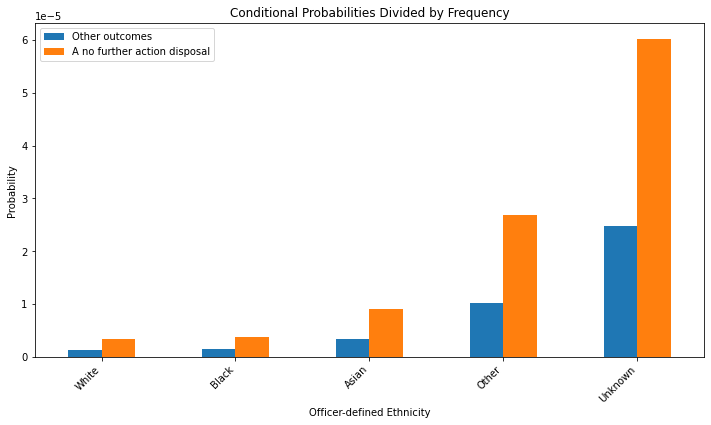

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has columns 'Officer-defined ethnicity' and 'target'
# Calculate the frequency of each officer-defined ethnicity
ethnicity_freq = df['Officer-defined ethnicity'].value_counts()

# Calculate the conditional probabilities
ethnicity_table = pd.crosstab(df['Officer-defined ethnicity'], df['target'])
ethnicity_prob = ethnicity_table.div(ethnicity_table.sum(axis=1), axis=0)

# Merge the frequency and conditional probabilities
ethnicity_freq_prob = pd.merge(ethnicity_freq.to_frame(name='Frequency'),
                               ethnicity_prob,
                               left_index=True,
                               right_index=True)

# Divide the conditional probabilities by the frequency
ethnicity_freq_prob['Other outcomes'] = ethnicity_freq_prob[0] / ethnicity_freq_prob['Frequency']
ethnicity_freq_prob['A no further action disposal'] = ethnicity_freq_prob[1] / ethnicity_freq_prob['Frequency']

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))
ethnicity_freq_prob[['Other outcomes', 'A no further action disposal']].plot(kind='bar', ax=ax)

# Set plot title and labels
ax.set_title('Conditional Probabilities Divided by Frequency')
ax.set_xlabel('Officer-defined Ethnicity')
ax.set_ylabel('Probability')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the bottom margin to prevent overlapping labels
plt.subplots_adjust(bottom=0.3)

# Display the plot
plt.show()

In [66]:
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(df['Officer-defined ethnicity'], df['Self-defined ethnicity'])

# Filter the contingency table for "Other" and "Unknown" officer-defined ethnicities
filtered_table = contingency_table.loc[['Other', 'Unknown'], :]

# Print the filtered contingency table
print("Self-defined Ethnicity for 'Other' and 'Unknown' Officer-defined Ethnicities:")
print(filtered_table)

Self-defined Ethnicity for 'Other' and 'Unknown' Officer-defined Ethnicities:
Self-defined ethnicity     Asian/Asian British - Any other Asian background  \
Officer-defined ethnicity                                                     
Other                                                                  3891   
Unknown                                                                 184   

Self-defined ethnicity     Asian/Asian British - Bangladeshi  \
Officer-defined ethnicity                                      
Other                                                     84   
Unknown                                                   13   

Self-defined ethnicity     Asian/Asian British - Chinese  \
Officer-defined ethnicity                                  
Other                                                 19   
Unknown                                                3   

Self-defined ethnicity     Asian/Asian British - Indian  \
Officer-defined ethnicity                       

Self-defined Ethnicity for 'Other' and 'Unknown' Officer-defined Ethnicities:
Self-defined ethnicity     Asian/Asian British - Any other Asian background  \
Officer-defined ethnicity                                                     
Other                                                                  3891   
Unknown                                                                 184   

Self-defined ethnicity     Asian/Asian British - Bangladeshi  \
Officer-defined ethnicity                                      
Other                                                     84   
Unknown                                                   13   

Self-defined ethnicity     Asian/Asian British - Chinese  \
Officer-defined ethnicity                                  
Other                                                 19   
Unknown                                                3   

Self-defined ethnicity     Asian/Asian British - Indian  \
Officer-defined ethnicity                       

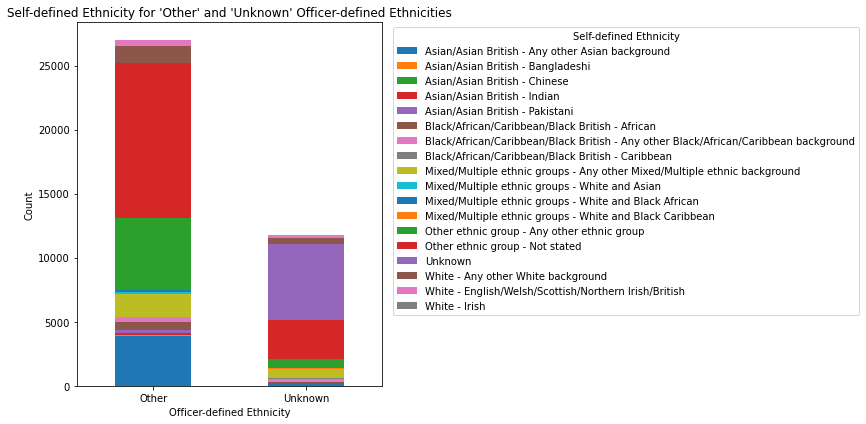

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(df['Officer-defined ethnicity'], df['Self-defined ethnicity'])

# Filter the contingency table for "Other" and "Unknown" officer-defined ethnicities
filtered_table = contingency_table.loc[['Other', 'Unknown'], :]

# Print the filtered contingency table
print("Self-defined Ethnicity for 'Other' and 'Unknown' Officer-defined Ethnicities:")
print(filtered_table)

# Create a stacked bar chart
ax = filtered_table.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set the chart title and labels
ax.set_title("Self-defined Ethnicity for 'Other' and 'Unknown' Officer-defined Ethnicities")
ax.set_xlabel("Officer-defined Ethnicity")
ax.set_ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend
plt.legend(title='Self-defined Ethnicity', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust layout to prevent legend from being cut off
plt.tight_layout()

# Display the chart
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Preprocess the data and create the binary target variable
df['Other_Outcome'] = (df['Outcome'] != 'A no further action disposal').astype(int)

# Select the relevant features
features = ['Officer-defined ethnicity', 'Age range', 'Gender', 'Object of search', 'Borough']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df[features])

# Scale the features using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['Other_Outcome'], test_size=0.2, random_state=42)

# Build and train the logistic regression model with L2 regularization
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model's performance on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Examine the model coefficients
coefficients = pd.DataFrame({'Feature': df_encoded.columns, 'Coefficient': model.coef_[0]})
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)
print("\nTop 10 Coefficients:")
print(coefficients.head(10))

Accuracy: 0.7200
Precision: 0.3043
Recall: 0.0005
F1-score: 0.0010

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     74574
           1       0.30      0.00      0.00     28979

    accuracy                           0.72    103553
   macro avg       0.51      0.50      0.42    103553
weighted avg       0.60      0.72      0.60    103553


Top 10 Coefficients:
                                              Feature  Coefficient  \
8                                   Age range_Unknown    -0.569601   
7                                     Age range_25-34     0.218543   
14                                     Gender_Unknown     0.214462   
6                                     Age range_18-24     0.189581   
9                                   Age range_over 34     0.110782   
15  Object of search_Anything to threaten or harm ...    -0.082162   
11                                      Gender_Female    -0.070941   


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preprocess the data and create the binary target variable
df['Other_Outcome'] = (df['Outcome'] != 'A no further action disposal').astype(int)

# Select the relevant features
features = ['Officer-defined ethnicity', 'Age range', 'Gender', 'Object of search', 'Borough']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df[features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['Other_Outcome'], test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model's performance on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Examine the model coefficients
coefficients = pd.DataFrame({'Feature': df_encoded.columns, 'Coefficient': model.coef_[0]})
print(coefficients)

Accuracy: 0.7200
Precision: 0.3191
Recall: 0.0005
F1-score: 0.0010
                                              Feature  Coefficient
0                     Officer-defined ethnicity_Asian    -0.146580
1                     Officer-defined ethnicity_Black    -0.023181
2                     Officer-defined ethnicity_Other    -0.125101
3                   Officer-defined ethnicity_Unknown    -0.128570
4                     Officer-defined ethnicity_White    -0.076423
5                                     Age range_10-17    -0.190044
6                                     Age range_18-24     0.402528
7                                     Age range_25-34     0.518576
8                                   Age range_Unknown    -1.661770
9                                   Age range_over 34     0.259849
10                                 Age range_under 10     0.171007
11                                      Gender_Female    -0.756420
12                                        Gender_Male    -0.53

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preprocess the data and create the binary target variable
df['Other_Outcome'] = (df['Outcome'] != 'A no further action disposal').astype(int)

# Select the relevant features
features = ['Officer-defined ethnicity', 'Age range', 'Gender', 'Object of search', 'Borough']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df[features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['Other_Outcome'], test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model's performance on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Examine the model coefficients
coefficients = pd.DataFrame({'Feature': df_encoded.columns, 'Coefficient': model.coef_[0]})

# Find the features with the smallest coefficient values
smallest_coefficients = coefficients.nsmallest(10, 'Coefficient')

print("\nFeatures with the Smallest Coefficients:")
print(smallest_coefficients)

Accuracy: 0.7200
Precision: 0.3191
Recall: 0.0005
F1-score: 0.0010

Features with the Smallest Coefficients:
                                              Feature  Coefficient
8                                   Age range_Unknown    -1.661770
15  Object of search_Anything to threaten or harm ...    -0.853578
11                                      Gender_Female    -0.756420
13                                       Gender_Other    -0.712820
20                         Object of search_Fireworks    -0.552235
12                                        Gender_Male    -0.535754
5                                     Age range_10-17    -0.190044
48                                     Borough_Newham    -0.183747
34                                  Borough_Greenwich    -0.166240
42                                  Borough_Islington    -0.157604


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preprocess the data and create the binary target variable
df['Other_Outcome'] = (df['Outcome'] != 'A no further action disposal').astype(int)

# Select the relevant features
features = ['Officer-defined ethnicity', 'Age range', 'Gender', 'Object of search', 'Borough']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df[features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['Other_Outcome'], test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model's performance on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Examine the model coefficients
coefficients = pd.DataFrame({'Feature': df_encoded.columns, 'Coefficient': model.coef_[0]})

# Find the features with the smallest coefficient values
smallest_coefficients = coefficients.nsmallest(10, 'Coefficient')

print("\nFeatures with the Smallest Coefficients:")
print(smallest_coefficients)

# Find the features with the largest coefficient values
largest_coefficients = coefficients.nlargest(10, 'Coefficient')

print("\nFeatures with the Largest Coefficients:")
print(largest_coefficients)

Accuracy: 0.7200
Precision: 0.3191
Recall: 0.0005
F1-score: 0.0010

Features with the Smallest Coefficients:
                                              Feature  Coefficient
8                                   Age range_Unknown    -1.661770
15  Object of search_Anything to threaten or harm ...    -0.853578
11                                      Gender_Female    -0.756420
13                                       Gender_Other    -0.712820
20                         Object of search_Fireworks    -0.552235
12                                        Gender_Male    -0.535754
5                                     Age range_10-17    -0.190044
48                                     Borough_Newham    -0.183747
34                                  Borough_Greenwich    -0.166240
42                                  Borough_Islington    -0.157604

Features with the Largest Coefficients:
                                              Feature  Coefficient
14                                     Gender_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Preprocess the data and create the binary target variable
df['Other_Outcome'] = (df['Outcome'] != 'A no further action disposal').astype(int)

# Select the relevant features
features = ['Officer-defined ethnicity', 'Age range', 'Gender', 'Object of search', 'Borough']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df[features])

# Split the data into features (X) and target (y)
X = df_encoded
y = df['Other_Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Build and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# Evaluate the model's performance on the testing set
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train_resampled, cv=5, scoring='f1')
print(f"\nCross-validation F1 scores: {cv_scores}")
print(f"Mean CV F1 score: {np.mean(cv_scores):.4f}")

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

ModuleNotFoundError: No module named 'imblearn'

In [77]:
pip install imbalanced-learn

     |████████████████████████████████| 258 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 8.0 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preprocess the data and create the binary target variable
df['Other_Outcome'] = (df['Outcome'] != 'A no further action disposal').astype(int)

# Select the relevant features
features = ['Officer-defined ethnicity', 'Age range', 'Gender', 'Object of search', 'Borough']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df[features])

# Split the data into features (X) and target (y)
X = df_encoded
y = df['Other_Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model's performance on the testing set
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1')
print(f"\nCross-validation F1 scores: {cv_scores}")
print(f"Mean CV F1 score: {np.mean(cv_scores):.4f}")

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Accuracy: 0.5618
Precision: 0.3580
Recall: 0.7134
F1-score: 0.4767

Cross-validation F1 scores: [0.4721729  0.47662232 0.47230729 0.47790479 0.47278916]
Mean CV F1 score: 0.4744

Top 10 Most Important Features:
                               Feature  Importance
8                    Age range_Unknown    0.282408
7                      Age range_25-34    0.079169
6                      Age range_18-24    0.073821
9                    Age range_over 34    0.050271
5                      Age range_10-17    0.046574
17   Object of search_Controlled drugs    0.026914
3    Officer-defined ethnicity_Unknown    0.023910
21  Object of search_Offensive weapons    0.021439
12                         Gender_Male    0.020453
14                      Gender_Unknown    0.018677


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

# Preprocess the data and create the binary target variable
df['Other_Outcome'] = (df['Outcome'] != 'A no further action disposal').astype(int)

# Select the relevant features
features = ['Officer-defined ethnicity', 'Age range', 'Gender', 'Object of search', 'Borough']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df[features])

# Feature engineering
df_encoded['Age_Unknown'] = df_encoded['Age range_Unknown']
df_encoded['Drug_Search'] = df_encoded['Object of search_Controlled drugs']
df_encoded['Weapon_Search'] = df_encoded['Object of search_Offensive weapons']

# Split the data into features (X) and target (y)
X = df_encoded
y = df['Other_Outcome']

# Split the data into training and testing sets using stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Calculate class weights
class_weights = dict(zip(np.unique(y), len(y) / (len(np.unique(y)) * np.bincount(y))))

# Define the XGBoost model with adjusted hyperparameters
xgb_model = XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=300,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=class_weights[1],
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_imputed, y_train)

# Make predictions on the test set (probabilities)
y_pred_proba = xgb_model.predict_proba(X_test_imputed)[:, 1]

# Find the best threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Make predictions using the best threshold
y_pred = (y_pred_proba >= best_threshold).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:41:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Threshold: 0.3803
Accuracy: 0.5178
Precision: 0.3469
Recall: 0.8206
F1-score: 0.4876

Top 10 Most Important Features:
                                              Feature  Importance
8                                   Age range_Unknown    0.304718
14                                     Gender_Unknown    0.092367
58                                        Age_Unknown    0.069948
5                                     Age range_10-17    0.055767
3                   Officer-defined ethnicity_Unknown    0.025139
17                  Object of search_Controlled drugs    0.020835
44                       Borough_Kingston upon Thames    0.018040
57                                Borough_Westminster    0.017983
24                       Borough_Barking and Dagenham    0.017423
15  Object of search_Anything to threaten or harm ...    0.014311


In [81]:
pip install xgboost

     |████████████████████████████████| 2.1 MB 4.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
